In [2]:
import numpy as np

In [3]:
#load IMS data (file should not include non-numbers, add first row to be the hours, i.e. 6,7,8...)
rdata = np.genfromtxt('/Users/alonhrl/Documents/Alon/MA-MSC/development/Radiation-data/קרינה שעתית גלובלית בית דגן-01-22-as-array.csv', delimiter=',')
rdata = rdata.astype('int32')
print(rdata)

[[-2147483648           8           9          10          11          12
           13          14          15          16          17]
 [          1          32          90         241         215         265
          244         232         143          48           2]
 [          3          30         195         364         418         552
          534         455         327         160          21]
 [          3          90         266         114          71         551
          558         407         362         193          23]
 [          2          42         210         351         529         535
          126         125         148          82          18]
 [          0           9          22          34          55         122
          174         186         125          61          10]
 [          3          99         284         445         551         596
          580         503         358         127          22]
 [          3          88         283    

##### Remove upper row which are the hours

In [4]:
rdata = rdata[1:]
print(rdata)

[[  1  32  90 241 215 265 244 232 143  48   2]
 [  3  30 195 364 418 552 534 455 327 160  21]
 [  3  90 266 114  71 551 558 407 362 193  23]
 [  2  42 210 351 529 535 126 125 148  82  18]
 [  0   9  22  34  55 122 174 186 125  61  10]
 [  3  99 284 445 551 596 580 503 358 127  22]
 [  3  88 283 447 553 602 590 509 376 198  31]
 [  3  91 286 451 553 593 572 480 351 181  27]
 [  3  95 288 442 550 585 503 361 186 111  46]
 [  3  91 279 442 559 604 579 500 372 195  35]
 [  4  94 274 436 549 602 590 508 377 203  39]
 [  4  95 271 448 429 595 596 519 327 191  41]
 [  3  88 161 275 505 576 536 447 363 139  19]
 [  3  33 130  87  54 126 125  82  82  78  32]
 [  1  19  91 199 139 591 241 112 173  17   9]
 [  0  14  43  81  79 140  78 134  96  20   6]
 [  4 114 319 487 604 658 647 566 429 246  54]
 [  4 148 308 478 593 534 477 560 414 235  55]
 [  1  13  54 149 248 417 239 302 222  84  11]
 [  6  73 237 365 541 541 570 430 276 193  19]
 [  4 131 319 484 601 658 653 540 410 252  60]
 [  5 133 307

##### Calculate accumulated radiation per day

In [5]:
dsum = rdata.sum(axis=1)
print (dsum)

[1513 3059 2638 2168  798 3568 3680 3588 3170 3659 3676 3516 3112  832
 1592  691 4128 3806 1740 3251 4112 4144 2588  958 4187 2486 2342 1145
 2346 4306 3514]


In [6]:
# Add the days row
row, col = rdata.shape
days = np.empty(row, dtype=object)
for x in range(row):
    days[x] = x+1

In [7]:
daySum = np.vstack([days, dsum])
print (daySum)

[[1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27
  28 29 30 31]
 [1513 3059 2638 2168 798 3568 3680 3588 3170 3659 3676 3516 3112 832
  1592 691 4128 3806 1740 3251 4112 4144 2588 958 4187 2486 2342 1145
  2346 4306 3514]]


##### Add Eumetsat daily radiation

In [12]:
eumetrdata = np.genfromtxt('/Users/alonhrl/Documents/Alon/MA-MSC/development/Radiation-data/mon_eumetsat_rad-savetxt.csv', delimiter=',', dtype=np.int16)
eumetrdata = eumetrdata.astype('int16')

# calculate daily radiation
eumdsum = eumetrdata.sum(axis=1)
print (eumdsum)

[1656 3445 2727 2187  753 3574 3590 3595 3349 3627 3645 3466 3128  833
 2188  507 1236 3979 1559 3014 4054 4066 2126 1001 4175 2483 2534 1322
 1890 4319 3476]


'[2850 2634 3124 2755 1297 2975 3119 2653 2562 1859 1463 1121 2568 3195\n 3450 3599  890 1016 3292 2305 2523 2336 3492 3068  896 1990 3562 2029\n 1861 2775 2344]'

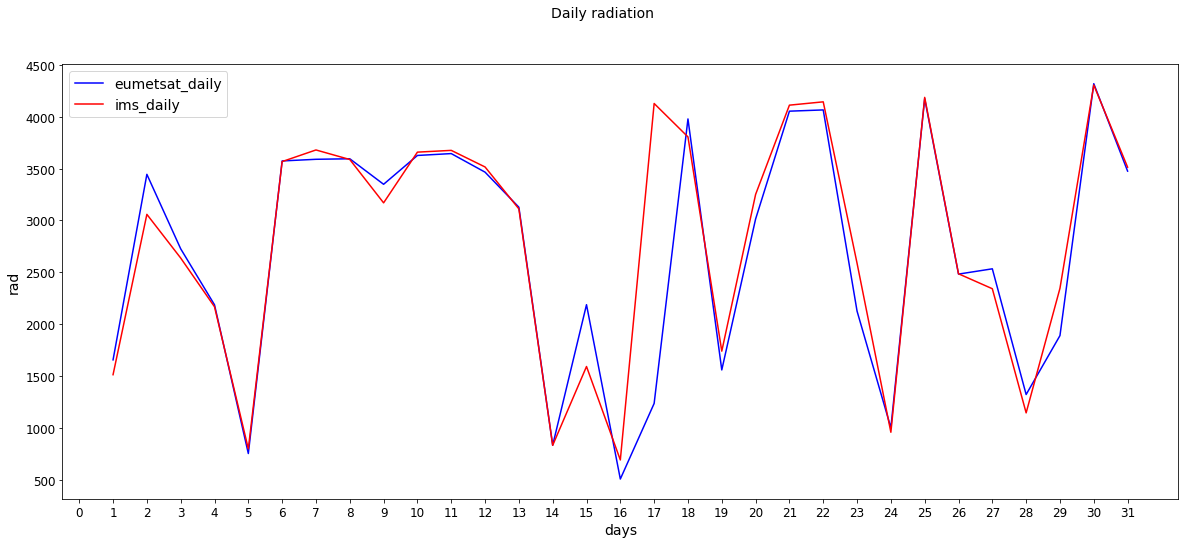

In [14]:
import matplotlib.pyplot as plt

x = daySum[0]
ims_daily = daySum[1]
eumetsat_daily = eumdsum

fig, ax = plt.subplots()

x = daySum[0]
ax.plot(x, eumetsat_daily, "-b" ,label="eumetsat_daily")
ax.plot(x, ims_daily, "-r", label="ims_daily")
ax.set_xticks(np.arange(0, len(x)+1, 1))
ax.set_xlabel('days', fontsize=14)
ax.set_ylabel('rad', fontsize=14)

fig.suptitle('Daily radiation', fontsize=14)
plt.rc('legend', fontsize=14)
plt.legend(loc="upper left")
plt.rcParams["figure.figsize"] = (20,8)
plt.rcParams.update({'font.size': 12})
#plt.rc('xtick', labelsize=8)
plt.draw()